# Assignment 02: 

## Logistic regression weight update process

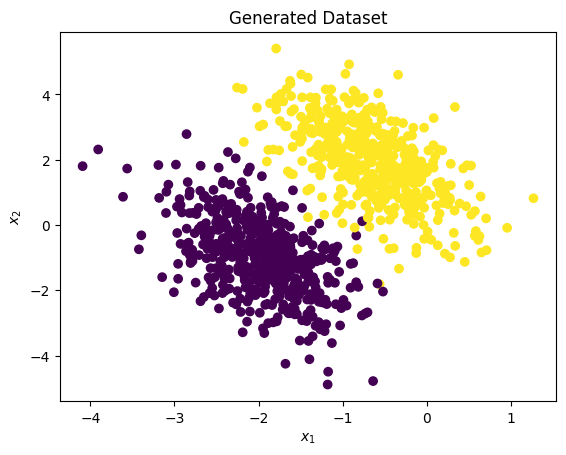

In [28]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_blobs

# Generate synthetic data
np . random . seed (0)
centers = [[ -5 , 0] , [0 , 1.5]]
X , y = make_blobs ( n_samples =1000 , centers = centers , random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np.dot (X , transformation )

# Add a bias term to the feature matrix
X = np.c_ [ np.ones(( X.shape [0] , 1)) , X ]

# Define the logistic sigmoid function
def sigmoid ( z ) :
    return 1 / (1 + np . exp ( - z ) )

# Define the logistic loss ( binary cross - entropy )   function
def log_loss ( y_true , y_pred ) :
    epsilon = 1e-15
    y_pred = np . clip ( y_pred , epsilon , 1 - epsilon )
    # Clip to avoid log (0)
    return - ( y_true * np.log ( y_pred ) + (1 - y_true ) * np.log(1 - y_pred))

# Dataset
plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Generated Dataset")
plt.show()

### Questin 1.2

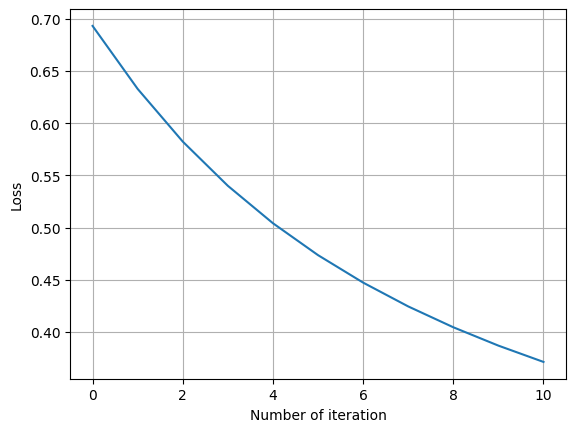

In [29]:
# Initialize coefficients
W = np.zeros ( (X.shape[1],1))

learning_rate = 0.1
iterations = 10
cost_history_gd = []

N = X.shape[0]
D = X.shape[1]-1

N_1 = np.ones((N,1))
A = np.zeros((N,N))

# add initial cost to history
cost = 0
for n in range(N):
    loss = log_loss(y[n], (sigmoid(W.T@X[n,:].reshape(D+1,1)))).item()
    cost  += loss
total_cost = cost/N
cost_history_gd.append(total_cost)

# Gradient descent loop    
for i in range(iterations):
    for i in range(N):
        A[i,i] = sigmoid(W.T@X[i,:].reshape(D+1,1))-y[i]
    grad = (N_1.T@A@X).T/N
    W = W - learning_rate*grad
    cost = 0
    for n in range(N):
        loss = log_loss(y[n], (sigmoid(W.T@X[n,:].reshape(D+1,1)))).item()
        cost  += loss
    total_cost = cost/N    
    cost_history_gd.append(total_cost)
    
#plot the loss history
plt.plot(cost_history_gd)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()

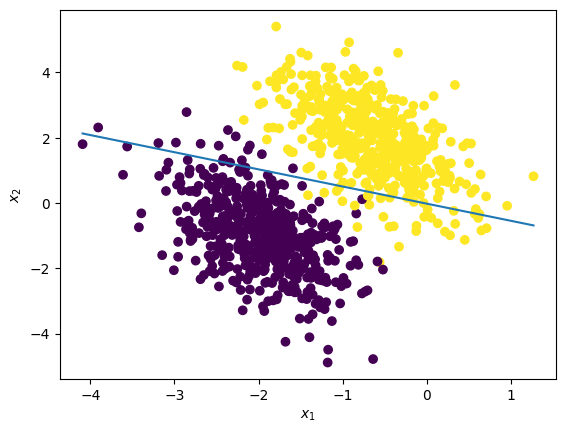

In [30]:
x1 = np.linspace(min(X[:,1]),max(X[:,1]),100)
x2 = -(W[0]+W[1]*x1)/W[2]

# Plot
plt.scatter(X[:,1], X[:,2], c=y)
plt.plot(x1,x2 )
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()


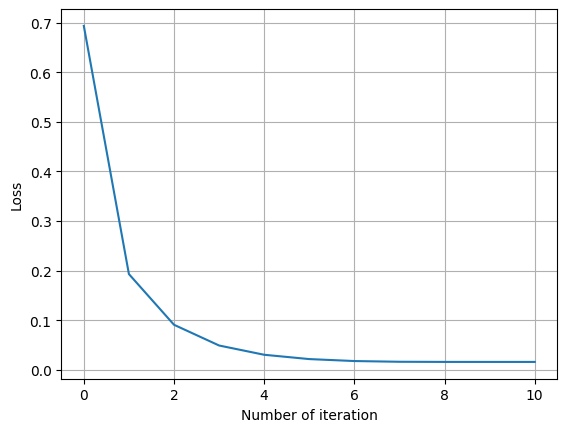

In [24]:

W = np.zeros ( (X.shape [1],1))
cost_history_newton = []
S = np.zeros((N,N))
N = X.shape[0]
D = X.shape[1]-1
N_1 = np.ones((N,1))
A = np.zeros((N,N))

cost = 0
for n in range(N):
    loss = log_loss(y[n], (sigmoid(W.T@X[n,:].reshape(D+1,1)))).item()
    cost += loss
total_cost = cost/N
cost_history_newton.append(total_cost)

for i in range(iterations):
    for i in range(N):
        A[i,i] = sigmoid(W.T@X[i,:].reshape(D+1,1))-y[i]
    grad = (N_1.T@A@X).T/N
    
    for i in range(N):
        S[i,i] = (sigmoid(W.T@X[i,:].reshape(D+1,1)) - y[i])*(1-sigmoid(W.T@X[i,:].reshape(D+1,1))-y[i])
    H = (X.T@S@X)/N
    W = W - np.linalg.inv(H)@grad
    cost = 0
    for n in range(N):
        loss = log_loss(y[n], (sigmoid(W.T@X[n,:].reshape(D+1,1)))).item()
        cost += loss
    total_cost = cost/N
    cost_history_newton.append(total_cost)
       
#plot
plt.plot(cost_history_newton)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()


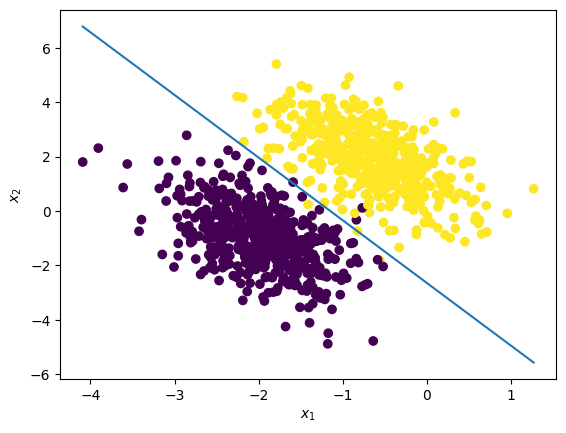

In [26]:
x1 = np.linspace(min(X[:,1]),max(X[:,1]),100)
x2 = -(W[0]+W[1]*x1)/W[2]

# Plot
plt.scatter(X[:,1], X[:,2], c=y)
plt.plot(x1,x2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()


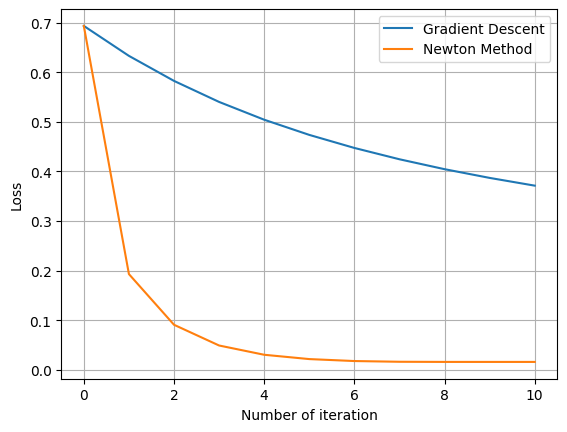

In [25]:
# plot gradient descent and Newton method results in same figure
plt.plot(cost_history_gd)
plt.plot(cost_history_newton)
plt.legend(['Gradient Descent', 'Newton Method'])
plt.xlabel('Number of iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()


## Perform grid search for hyper-parameter tuning

In [29]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import fetch_openml
from sklearn . linear_model import LogisticRegression
from sklearn . model_selection import GridSearchCV , train_test_split
from sklearn . pipeline import Pipeline
from sklearn . preprocessing import StandardScaler
from sklearn . metrics import accuracy_score
from sklearn . utils import check_random_state

# data loading

train_samples = 500
X , y = fetch_openml ("mnist_784", version =1 , return_X_y = True ,as_frame = False )
random_state = check_random_state(0)
permutation = random_state.permutation ( X . shape [0])
X = X [ permutation ]
y = y [ permutation ]
print(X.shape )
X = X.reshape (( X . shape [0] , -1) )
print(X.shape)
X_train , X_test , y_train , y_test = train_test_split (X , y ,train_size = train_samples , test_size =100)


c:\Users\Kavindu Kalinga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000, 784)


In [34]:
pipe = Pipeline ([
    ('scaler' , StandardScaler ()),
    ('classifier' , LogisticRegression ( penalty ='l1' , solver ='liblinear' , multi_class= 'auto' ))
])

param_grid = [
    {'classifier__C' : np . logspace (-2 , 2 , 9) }
]

grid_search = GridSearchCV ( pipe , param_grid = param_grid , cv =5)

grid_search.fit(X_train , y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


c:\Users\Kavindu Kalinga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

# Access the grid search results, including hyperparameters and scores
results = grid_search.cv_results_
c_values = np.logspace(-2, 2, 9)  # The values of C used in the grid search

# Extract the mean test scores (classification accuracy) for each C value
mean_test_scores = results['mean_test_score']

print(best_params)
# Plot the classification accuracy vs. C
plt.figure(figsize=(10, 6))
plt.semilogx(c_values, mean_test_scores, marker='o')
plt.xlabel('Hyperparameter C')
plt.ylabel('Classification Accuracy')


# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming you have already trained and obtained predictions
y_pred = best_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("\n\nPrecision = ",precision)
print("Recall = ",recall)
print("F1-Score = ",f1)
